# Assignment 7: Further Exploration of Chicago Crimes
- with thanks to Eric Potash


In this assignment we will continue to explore the Chicago crimes dataset using the more advanced operations we've learned including merging and group aggregation.

1. Load the 2017 crime data from assignment 5. Also load the [community area socioeconomic data](https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2) and get rid of the row corresponding to the whole city of Chicago (it's missing a `Community Area Number`).

    (**Downloading the data**. To download the data you'll need to Export to CSV on the web page.)

    Calculate the number of crimes per community area. Merge this with the socioeconomic data to plot a scatter with per capita income on the x axis and crime count on the y axis. Save the plot as `crimes_by_income.png`.

    Hint:
     - Turn the crime counts into a dataframe using `reset_index()` as we discussed. Either name the community area nunber column `Community Area Number` to match the corresponding column in the socioeconomic data, or use separate `left_on` and `right_on` arguments to `merge()`.
     - To make a scatter plot, call `plot()` on the DataFrame with an argument `kind='scatter'` and additional arguments `x` and `y` specifying the names of the columns to use for `x` and `y` data.
    
2. Repeat #1 for homicide counts.

    Hint: The homicide counts will be missing rows for community areas that had no homicides. The default, inner, merge between homocide counts and socioeconomic data will thus be missing these areas. To get the right answer, you will need to select a different merge type using the `how` argument and then fill in the missing homocide counts with zeros.

<AxesSubplot:xlabel='PER CAPITA INCOME ', ylabel='Crime Count'>

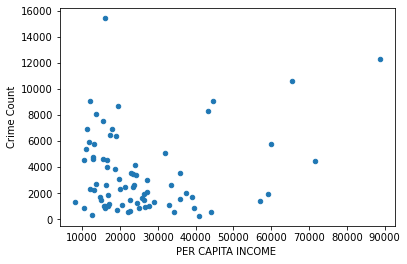

In [6]:
# Question 1
import pandas as pd
# load and clean data
crimes = pd.read_csv('Crimes_-_2001_to_present.csv')
socio = pd.read_csv('Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv')
socio = socio.dropna(subset=['Community Area Number'])

# calculate crimes by community area
crime_counts = crimes['Community Area'].value_counts().reset_index()
crime_counts.columns = ['Community Area', 'Crime Count']

# merge with socioeconomic data
crime_counts_socio = crime_counts.merge(socio, left_on='Community Area', right_on='Community Area Number')

# plot
crime_counts_socio.plot(kind='scatter', y='Crime Count', x='PER CAPITA INCOME ')

<AxesSubplot:xlabel='PER CAPITA INCOME ', ylabel='Homicide Count'>

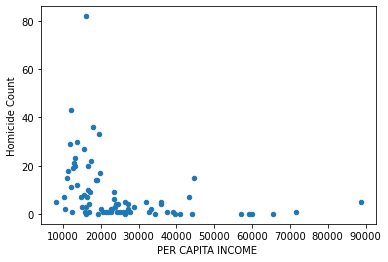

In [5]:
# Question 2
import pandas as pd

# load and clean data
crimes = pd.read_csv('Crimes_-_2001_to_present.csv')
socio = pd.read_csv('Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv')
socio = socio.dropna(subset=['Community Area Number'])

# calculate homicides by community area
homicides = crimes[crimes['Primary Type'] == 'HOMICIDE']
homicide_counts = homicides['Community Area'].value_counts().reset_index()
homicide_counts.columns = ['Community Area', 'Homicide Count']

# right merge to retain community areas with no homicides
homicide_counts_socio = homicide_counts.merge(socio, 
                                              left_on='Community Area', 
                                              right_on='Community Area Number',
                                              how='right')
# fill missing homicide counts with zeros
homicide_counts_socio['Homicide Count'].fillna(0, inplace=True)

# plot
homicide_counts_socio.plot(kind='scatter', y='Homicide Count', x='PER CAPITA INCOME ')